# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Open the data file and study the general information. 

#### Reading csv file:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/vehicles_us.csv') #to read the csv file to dataframe
display(data.head(10)) #to print the first ten rows

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


----------------The first ten rows of data have been acquired.--------------

#### General info of data:

In [2]:
data.info() #to get the information of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


#### checking for missing values:

In [3]:
data.isna().sum() #to get total number of missing values

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Conclusion

The given dataframe has about 51525 entries i.e., rows and 13 columns.

Lets focus on the columns now:

All the columns except 'model_year','cylinders','odometer','is_4wd' and 'date_posted' are assigned with their appropriate datatypes, where as these columns data types are needed to be changed from their corresponding datatypes to int datatype.

Considering the missing values, there are five columns with all above 3500 missing values.

### Step 2. Data preprocessing

#### Dealing with missing values:

In [4]:
data['is_4wd'].value_counts() #to check the number of unique values in a data frame

1.0    25572
Name: is_4wd, dtype: int64

In [5]:
data['is_4wd'] = data['is_4wd'].fillna(0.0) #to fill in the missing values

In [6]:
data['is_4wd'].value_counts() #to check the number of unique values in a data frame

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In the 'is_4wd' column we have only one value 1.0 and in the description it was given that it is a  boolean-type so I think filling the missing values with the 0.0 would be the right choice.

In [7]:
data['model_year'].value_counts().head(10) #to check the number of unique values in a data frame

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1954.0       1
1949.0       1
1948.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64

In [8]:
data['model_year'].describe() #to get all information on the numerical statistics of the column

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [9]:
data['model_year'].value_counts().head(10)

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1954.0       1
1949.0       1
1948.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64

From the unique values of 'model_year' column we can see that there are values mostly less than 1960 which aren't repeated much. Let's analyze it.

In [10]:
data.query('model_year < 1960.0').head(30) #to check first 30 rows of data of years less than 1960

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10018,23900,1955.0,ford f250,excellent,6.0,gas,47180.0,manual,truck,blue,0.0,2018-12-22,61
14752,15000,1954.0,ford f-150,excellent,NaN,gas,3565.0,manual,pickup,black,0.0,2019-02-16,13
22595,21000,1948.0,chevrolet impala,like new,8.0,gas,4000.0,automatic,sedan,red,0.0,2019-01-18,24
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,0.0,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,0.0,2018-06-24,25
34713,5000,1936.0,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,0.0,2018-11-22,10
36582,44900,1949.0,chevrolet suburban,good,NaN,gas,1800.0,automatic,wagon,orange,0.0,2018-08-19,10
39580,35000,1958.0,chevrolet impala,excellent,8.0,gas,3184.0,automatic,coupe,black,0.0,2018-05-19,33
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59
48414,37900,1958.0,chevrolet impala,good,8.0,gas,62799.0,automatic,coupe,NaN,0.0,2018-08-11,10


In the table, we can see that some data is wrongly assigned like consider year 1908.0, cadillac escalade and gmc yukon vehicles weren't even produced till then, how come the model_year if those can be 1908 when they were manufatured post 1908? So I decided to drop such values in the next step.

In [11]:

data.drop(data[data['model_year'] < 1948.0].index,inplace=True) #to drop the values and modify the dataframe

In [12]:
#to check if the false values are dropped
data.query('model_year < 1960.0').head(30) 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10018,23900,1955.0,ford f250,excellent,6.0,gas,47180.0,manual,truck,blue,0.0,2018-12-22,61
14752,15000,1954.0,ford f-150,excellent,NaN,gas,3565.0,manual,pickup,black,0.0,2019-02-16,13
22595,21000,1948.0,chevrolet impala,like new,8.0,gas,4000.0,automatic,sedan,red,0.0,2019-01-18,24
36582,44900,1949.0,chevrolet suburban,good,NaN,gas,1800.0,automatic,wagon,orange,0.0,2018-08-19,10
39580,35000,1958.0,chevrolet impala,excellent,8.0,gas,3184.0,automatic,coupe,black,0.0,2018-05-19,33
48414,37900,1958.0,chevrolet impala,good,8.0,gas,62799.0,automatic,coupe,NaN,0.0,2018-08-11,10


In [13]:
data['model_year'] = data['model_year'].fillna(data.groupby(['model'])['model_year'].transform('median'))

I tried filling in the model_year missing values on the basis of the vehicle model and it's model year's median value in order to get much accurate data.

In [14]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [15]:
data['model_year'].isna().sum() #to check for missing vlues

0

In [16]:
data['cylinders'] = data['cylinders'].fillna(-1)

In [17]:
data['cylinders'].isna().sum()

0

In [18]:
data['paint_color'].value_counts() #to check the number of unique values in a data frame

white     10028
black      7691
silver     6243
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      101
Name: paint_color, dtype: int64

In [19]:
data['paint_color'] = data['paint_color'].fillna('unknown')

As that data in the 'paint_color' column are categorical I prefer filling it with 'unknown' so that the missing values don't really effect our data

In [20]:
data['odometer'] = data['odometer'].fillna(data.groupby(['model_year','condition'])['odometer'].transform('median')) 


In [21]:
data['odometer'].isna().sum()

5

In [22]:
odo_median = data['odometer'].median()

In [23]:
data['odometer'] = data['odometer'].fillna(odo_median)

In [24]:
data['odometer'].isna().sum()

0

In [25]:
data.info() #to get the general information of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51521 entries, 0 to 51524
Data columns (total 13 columns):
price           51521 non-null int64
model_year      51521 non-null float64
model           51521 non-null object
condition       51521 non-null object
cylinders       51521 non-null float64
fuel            51521 non-null object
odometer        51521 non-null float64
transmission    51521 non-null object
type            51521 non-null object
paint_color     51521 non-null object
is_4wd          51521 non-null float64
date_posted     51521 non-null object
days_listed     51521 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


In [26]:
data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

#### Changing data types :

In [27]:
data['is_4wd'] = data['is_4wd'].astype(bool)  #to change the datatype of the column to 'int'

In [28]:
data['model_year'] = data['model_year'].astype(int) #to change the datatype of the column to 'int'

In [29]:
data['odometer'] = data['odometer'].astype(int)

In [30]:
data['cylinders'] =  data['cylinders'].astype(int)

In [31]:
data['date_posted'] = pd.to_datetime(data['date_posted'],format='%Y-%m-%d') #to convert string type object to datetime format

In [32]:
data['price'].value_counts().head(10) #to check the number of unique values in a data frame

1         798
6995      719
5995      655
4995      624
3500      620
         ... 
49988       1
36600       1
300000      1
39873       1
11762       1
Name: price, Length: 3443, dtype: int64

In [33]:
data['price'].head(30) #to print the first 30 values

0      9400
1     25500
2      5500
3      1500
4     14900
5     14990
6     12990
7     15990
8     11500
9      9200
10    19500
11     8990
12    18990
13    16500
14    12990
15    17990
16    14990
17    13990
18    12500
19    13990
20     6990
21     5250
22     7500
23     7500
24     3950
25    11499
26     8499
27    12999
28    29800
29     5495
Name: price, dtype: int64

In [34]:
data['price'].describe() #to get all the numberical statistics of the column

count     51521.000000
mean      12132.455989
std       10041.108908
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [35]:
data['model'].value_counts().head(10) #to check the number of unique values in a data frame

ford f-150                           2794
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [36]:
data['fuel'].value_counts() #to check the number of unique values in a data frame

gas         47284
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

In [37]:
data['transmission'].value_counts() #to check the number of unique values in a data frame

automatic    46900
manual        2827
other         1794
Name: transmission, dtype: int64

In [38]:
data['days_listed'].value_counts().head(10) #to check the number of unique values in a data frame

18     959
24     950
22     945
19     941
20     934
      ... 
263      1
182      1
261      1
217      1
223      1
Name: days_listed, Length: 227, dtype: int64

In [39]:
data['days_listed'].describe() #to get all the numberical statistics of the column

count    51521.000000
mean        39.555346
std         28.204851
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [40]:
data['condition'].value_counts() #to check the number of unique values in a data frame

excellent    24771
good         20143
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [41]:
data['type'].value_counts() #to check the number of unique values in a data frame

SUV            12403
truck          12353
sedan          12154
pickup          6987
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            255
offroad          214
bus               24
Name: type, dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51521 entries, 0 to 51524
Data columns (total 13 columns):
price           51521 non-null int64
model_year      51521 non-null int64
model           51521 non-null object
condition       51521 non-null object
cylinders       51521 non-null int64
fuel            51521 non-null object
odometer        51521 non-null int64
transmission    51521 non-null object
type            51521 non-null object
paint_color     51521 non-null object
is_4wd          51521 non-null bool
date_posted     51521 non-null datetime64[ns]
days_listed     51521 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 5.2+ MB


#### Checking for duplicates and dealing with them :

In [43]:
data.drop_duplicates(subset=data.columns.difference(['date_posted','days_listed'])).head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,193850,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71


In [44]:
data.duplicated().sum()

0

# Conclusion

During the datapreprocessing I did the following modifications to the data to make it more accurate and easy to analyse:

Dealing with the missing values:------

1. The missing values in the column 'is_4wd' were filled with 0 as it was a boolean type parameter.

2. Missing values of columns 'model_year' and 'odometer' were filled up based on model and model_year,condition median values respectively.

3. The missing values in the columns 'cylinders' and 'paint_color' were filled with -1 and 'unknown' so that the missing values just stay in their place and dont interfere in the further analysis.

Changing data types :-----------

1. The columns namely 'model_year','cylinders',odometer' had the 'float' data type which wouldn't be easier to use in the further analysis so I converted it it 'int'.

2. As the column 'is_4wd' is a boolean type parameter , I changed it to dat type 'bool'.

3. The data in the 'date_posted' column has the string type object which can't be used for further calculation so I converted it to datetime format , hence the data type was changed to 'datetime64[ns]'.

Duplicates were eliminated from the data excluding the days_listed and date_posted columns as that isn't the criteria to analyse duplicates among the ads because these two columns always differ as the same ad can be posted repeatedly after few days.

### Step 3. Make calculations and add them to the table

#### Adding new columns to  the dataframe:

In [45]:
data['day_of_week'] = data['date_posted'].dt.weekday #to get the day of the week from the column

----------The day the ad was posted has been extracted from the data and added as a new column to the dataframe.----------

In [46]:
data['month'] = pd.DatetimeIndex(data['date_posted']).month #to get the value of month from the data in the column

----------The month the ad was posted has been extracted from the data and added as a new column to the dataframe.----------

In [47]:
data['year'] = pd.DatetimeIndex(data['date_posted']).year #to get the year from the data in the column

----------The year the ad was posted has been extracted from the data and added as a new column to the dataframe.----------

In [48]:
data['vehicle_age'] = data['year'] - data['model_year'] #to calculate the age of the vehicle

-----------The age of the vehicle when the ad was published has been calculated and added as new column to the dataframe.---------

In [49]:
data['vehicle_age'].describe()  #to get all the numberical statistics of the column 

count    51521.000000
mean         8.506978
std          6.061431
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         71.000000
Name: vehicle_age, dtype: float64

--------In the 'vehicle_age' column the minimum value of age is 0 years that may be because the vehicle was sold too quickly as soon as it was arrived.-------

In [50]:
data['vehicle_age'] = data['vehicle_age'].replace([0],[1])

I have replaced the 'vehicle_age' value 0 to 1 because that may cause a problem in our analysis when dealing with the 'avg_mileage'. Because then the 'avg_mileage' values would be undefined when mileage was divided by '0' vehicle_age.

In [51]:
data['mileage'] = data['odometer']  #to get the mileage of the vehicle

----------The mileage of the vehicle when the ad was posted has been extracted from the data and added as a new column to the dataframe.----------

In [52]:
data['vehicle_age'].describe() #to get all the numberical statistics of the column

count    51521.000000
mean         8.548747
std          6.005855
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         71.000000
Name: vehicle_age, dtype: float64

In [53]:
data['avg_mileage'] = data['mileage'] / data['vehicle_age'] #to get the average mileage of the vehicle

----------The average mileage of the vehicle when the ad was posted has been calculated from the data and added as a new column to the dataframe.----------

In [54]:
data['avg_mileage'].describe() #to get all the numberical statistics of the column

count     51521.000000
mean      17730.454523
std       12447.693603
min           0.000000
25%       10909.090909
50%       15213.000000
75%       21279.000000
max      373200.000000
Name: avg_mileage, dtype: float64

In [55]:
data['condition'] = data['condition'].replace(['new','like new','excellent','good','fair','salvage'],['5','4','3','2','1','0']) #to replace the old values with the new given values

---The condition column in the dataframe has been replaced by the numerical scale ranging from 0-5 and added as a modified column to the dataframe.---

In [56]:
data.head(10) #to get the first 10 rows of the dataframe

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,mileage,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,145000,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,88705,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,110000,18333.333333
3,1500,2003,ford f-150,1,8,gas,193850,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16,193850,12115.625000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,80903,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,57954,14488.500000
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,3,12,2018,3,79212,26404.000000
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,0,1,2019,6,109473,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,0,7,2018,6,104174,17362.333333
9,9200,2008,honda pilot,3,-1,gas,147191,automatic,SUV,blue,True,2019-02-15,17,4,2,2019,11,147191,13381.000000


In [57]:
data['condition'].value_counts() #to check the number of unique values in a data frame

3    24771
2    20143
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

In [58]:
data['condition'] = data['condition'].astype(int) #to change the data type of the column to 'int'

In [59]:
data['avg_mileage'] = data['avg_mileage'].astype(int)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51521 entries, 0 to 51524
Data columns (total 19 columns):
price           51521 non-null int64
model_year      51521 non-null int64
model           51521 non-null object
condition       51521 non-null int64
cylinders       51521 non-null int64
fuel            51521 non-null object
odometer        51521 non-null int64
transmission    51521 non-null object
type            51521 non-null object
paint_color     51521 non-null object
is_4wd          51521 non-null bool
date_posted     51521 non-null datetime64[ns]
days_listed     51521 non-null int64
day_of_week     51521 non-null int64
month           51521 non-null int64
year            51521 non-null int64
vehicle_age     51521 non-null int64
mileage         51521 non-null int64
avg_mileage     51521 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(12), object(5)
memory usage: 7.5+ MB


Additional columns such as 'day_of_week','month','year','vehicle_age','mileage' and 'avg_mileage' have been added to the dataframe .

While calculating the vehicle_age I noticed that few of the vehicles were posted and removed very quickly with in few days , in such cse the age became zero, which would create a problem in further analysis if avg_mileage is considered. Therefore, i have replaced it with 1 and I have also changed the date type of avg_mileage to int for hustle free analysis.

Then I changed the condition of vehicle to numerical scale so that it would be easier to analyze.

# Step 4. Carry out exploratory data analysis

## Analysing the 'price' factor

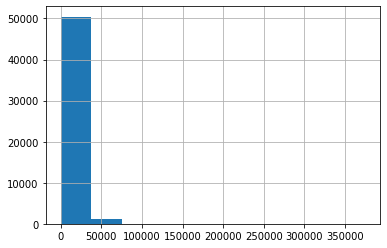

In [61]:
data['price'].hist(); #to plot a histogram for the given parameter

Initially when the histogram for the 'price' column is plotted, we observe that the number of vehicles costing around 40000 bucks are constant and when price is greater than 40000 the count has dropped to almost thousand and there are no vehicles above the price of 70000 to 75000 bucks.

Text(0.5, 1.0, 'Histogram of price of the vehicles')

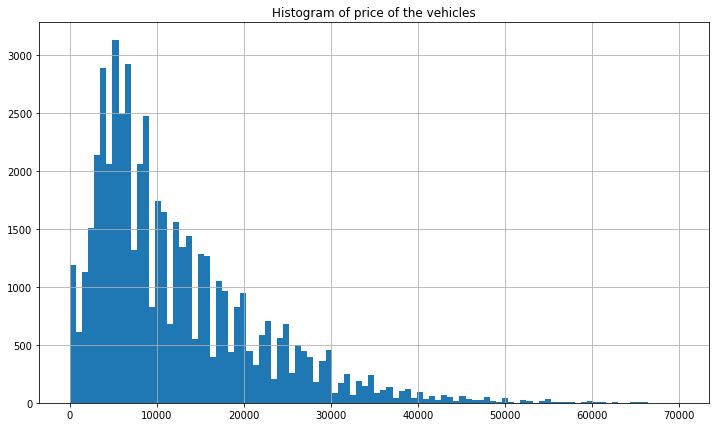

In [62]:
graph = data['price'].hist(bins=100,range=(0,70000),grid=True,figsize=(12,7)) #to plot a histogram for the given parameter
graph.set_title('Histogram of price of the vehicles');

When we look deep into the histogram details by increasing number of bins,figsize and specifying the range we can see that there is a whole different story over here. The observations from the graph are as follows:


1. The minimum value in the 'price' column is 1.00 which may be an outlier , however there might be few vehicles which people want to just give away or that might be just a fake advertisement and they just placed the minimum price as 0 will not be accepted as a price by the website.


2. The highest number of count is for the price ranging around 5000-6000 bucks which may be the used vehicles and donot belong to the premium vehicle brands. From this peak we can see that the values are reducing gradually though there are few major drops in the counts at prices like 7000,9000,11000 so on...till when the count is almost 10 to 0 till price of 67000 approximately.


3. Out of 51000+ entries maximum ads are only under a range of 3000 to 30000 bucks when maximum value of price is 3,75,000.

In [63]:
Q1 = data['price'].quantile(0.25) #to determine the first quartile

In [64]:
Q3 = data['price'].quantile(0.75) #to determine the second quartile

In [65]:
IQR = 1.5*(Q3 - Q1) #to determine the inter quartile range
lower_outlier = Q1 - IQR #to determine the lower outlier
upper_outlier = Q3 + IQR #to determine the upper outlier
print(lower_outlier)
print(upper_outlier)
lower_price = 100

-12758.5
34597.5


The upper outlier obtained is 34597.5 which can be treated as 35,000 approx. which are almost 100 in count.

I have assumed the very small price to be 100 bucks as there would be no vehicle for 100 bucks in current world.

# Data without outliers 

Text(0.5, 1.0, 'Histogram of price of vehicles without outliers')

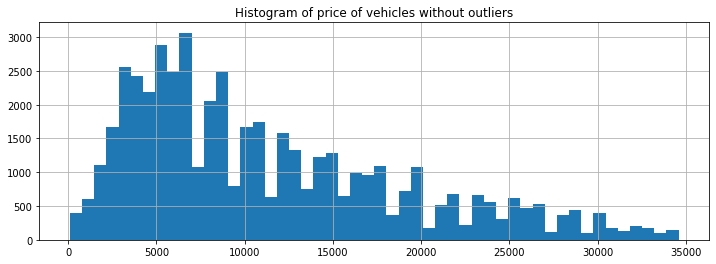

In [66]:
good_data = data.query('price > @lower_price and price < @upper_outlier') #to eliminate the outliers from the data
graph = good_data['price'].hist(bins=50,figsize=(12,4)) #to plot a histogram for the given parameter
graph.set_title('Histogram of price of vehicles without outliers');


In [67]:
good_data['model'].describe() #to get the numerical statistics of the data

count          49012
unique            99
top       ford f-150
freq            2653
Name: model, dtype: object

In [68]:
good_data['condition'].describe() #to get the numerical statistics of the data

count    49012.000000
mean         2.614258
std          0.708658
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

In [69]:
good_data['price'].describe() #to get the numerical statistics of the data

count    49012.000000
mean     11290.748388
std       7733.948861
min        105.000000
25%       5000.000000
50%       8995.000000
75%      15990.000000
max      34595.000000
Name: price, dtype: float64

# Comparing data with and without outliers.

Text(0.5, 1.0, 'Histogram of price with and without outliers')

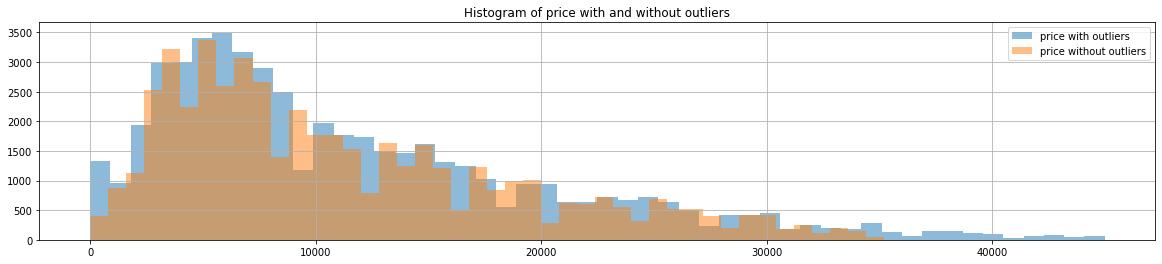

In [70]:
graph =data['price'].hist(bins=50,range=(0,45000),grid=True,figsize=(20,4),alpha=(0.5),label= 'price with outliers') #to plot a histogram for the given parameter
graph =good_data['price'].hist(bins=50,figsize=(20,4),range=(0,40000),alpha=(0.5),label= 'price without outliers') #to plot a histogram for the given parameter
graph.legend()
graph.set_title('Histogram of price with and without outliers');

When the price of vehicles of all the ads placed and price of the vehicles of the filtered ads where there are no unusual prices included we can see that there are few changes and slight shift in the bins and there are only few vehicles which have prices less than 100 bucks and extremely less vehicles with prices more that 35000 bucks.






# Analysing the vehicle's age

In [71]:
data['vehicle_age'].describe() #to get the numerical statistics of the data

count    51521.000000
mean         8.548747
std          6.005855
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         71.000000
Name: vehicle_age, dtype: float64

Text(0.5, 1.0, 'Histogram of age of vehicles')

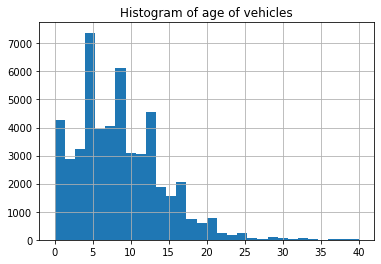

In [72]:
graph = data['vehicle_age'].hist(bins=30,range=(0,40)) #to plot a histogram for the given parameter
graph.set_title('Histogram of age of vehicles');

Initially when the histogram for the 'vehicle_age' column is plotted, we observe that the highest number of vehicles put for sale were 4.5 to 5 years old. The next highest count was for the vehicles with 6.5 to 9.5 years age, there by follows the vehicles which are newly manufactured and almost 13 year older ones. Rest of the vehicles that are older than 13 years weren't put for sale may be because those models were too old to be bought and didn't match the features of modern world vehicles.

In [73]:
data['vehicle_age'].describe() #to get the numerical statistics of the data in the column

count    51521.000000
mean         8.548747
std          6.005855
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         71.000000
Name: vehicle_age, dtype: float64

Text(0.5, 1.0, 'Histogram of age of vehicles in detail')

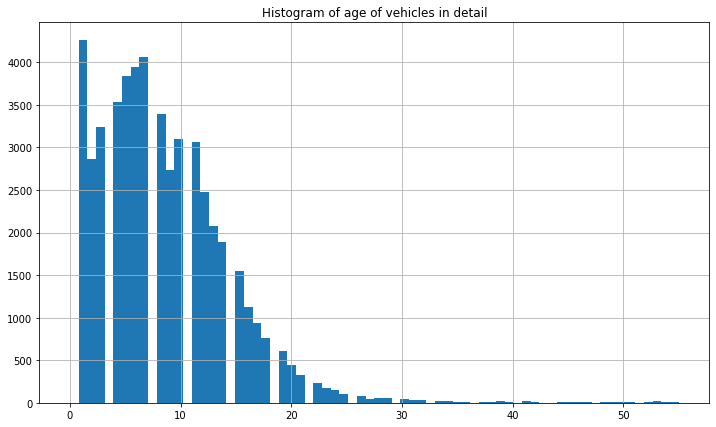

In [74]:
graph = data['vehicle_age'].hist(bins=70,range=(0,55),figsize=(12,7)) #to plot a histogram for the given parameter
graph.set_title('Histogram of age of vehicles in detail');

Let's just dive deep in to the histogram a bit more by increasing the number of bins and range. We can observe that few vehicles that are almost 3 yrs, 7yrs, 10-11yrs,14yrs old and so on.. are not sold at all. The number of vehicles has gradually dropped from 10.5yrs to 30 yrs and almost negligible vehicles age greater than 30 years.

In [75]:
Q1 = data['vehicle_age'].quantile(0.25) #to get the first quartile
Q1

4.0

In [76]:
Q3 = data['vehicle_age'].quantile(0.75) #to get the third quartile
Q3

12.0

In [77]:
IQR = 1.5*(Q3 - Q1) #to determine the inter quartile range
lower_outlier = Q1 - IQR #to determine the lower outlier
upper_outlier = Q3 + IQR #to determine the upper outlier
print(lower_outlier)
print(upper_outlier)

-8.0
24.0


# Data without outliers

Text(0.5, 1.0, 'Histogram of age of vehicles without outliers')

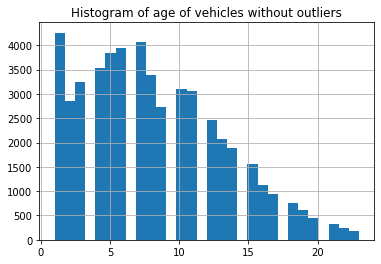

In [78]:
good_data = data.query('vehicle_age > @lower_outlier and vehicle_age < @upper_outlier') #to eliminate the outliers from the data
graph = good_data['vehicle_age'].hist(bins=30) #to plot a histogram for the given parameter
graph.set_title('Histogram of age of vehicles without outliers');

In [79]:
good_data['vehicle_age'].describe() #to get the numerical statistics of the data

count    50638.000000
mean         8.137723
std          5.034222
min          1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         23.000000
Name: vehicle_age, dtype: float64

In [80]:
good_data['fuel'].describe() #to get the numerical statistics of the data

count     50638
unique        5
top         gas
freq      46434
Name: fuel, dtype: object

From the graph we can observe that mostly the ads were placed for the vehicles aging from 1 to 11 years running mostly on gas and which are automatic.

# Comparing data with and without outliers.

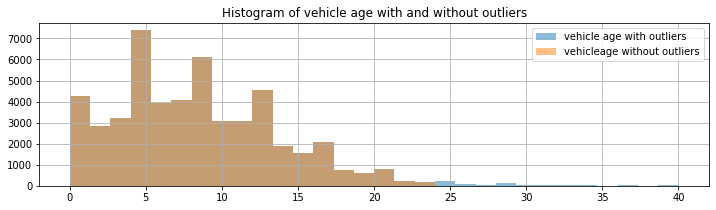

In [81]:
graph =data['vehicle_age'].hist(bins=30,range=(0,40),figsize=(12,3),alpha=(0.5),label='vehicle age with outliers') #to plot a histogram for the given parameter
graph =good_data['vehicle_age'].hist(bins=30,range=(0,40),figsize=(12,3),alpha=(0.5),label = 'vehicleage without outliers') #to plot a histogram for the given parameter
graph.set_title('Histogram of vehicle age with and without outliers')
graph.legend();

Here we can see that the histograms overlap to maximum extent except for the values greater than 24 years. Such outliers were eliminated because though the impact on the data is not much but it may effect the average or median indicators . Moreover, without them the data is much cleaner and much accurate for further analysis.

The vehicles older than 20 years itself are very rarely preferred by the people , so it would be perfect to eliminate the upper outlier value and proceeed further.



# Analysing the number of Cylinders

In [82]:
data['cylinders'].describe() #to get the numerical statistics of the data

count    51521.000000
mean         5.397682
std          2.670080
min         -1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

we can see that the missing values were set as -1 initially so now we need to slice them off from our data for analysis so that the numerical statistics of data aren't effected.

In [83]:
good_cyl = data.query('cylinders > -1')

Text(0.5, 1.0, 'Histogram of cylinders of vehicles')

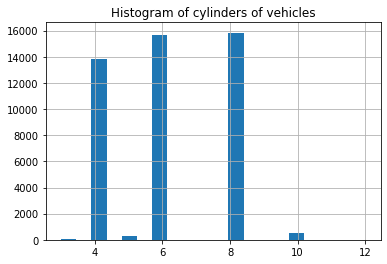

In [84]:
graph = good_cyl['cylinders'].hist(bins=20) #to plot a histogram for the given parameter
graph.set_title('Histogram of cylinders of vehicles');

In [85]:
Q1 = data['cylinders'].quantile(0.25) #to get the first quartile

In [86]:
Q3 = data['cylinders'].quantile(0.75) #to get the third quartile

In [87]:
IQR = 1.5*(Q3 - Q1) #to determine the inter quartile range
lower_outlier = Q1 - IQR #to determine the lower outlier
upper_outlier = Q3 + IQR #to determine the upper outlier
print(lower_outlier)
print(upper_outlier)

-2.0
14.0


# Data without Outliers

Text(0.5, 1.0, 'Histogram of cylinders of vehicles without outliers')

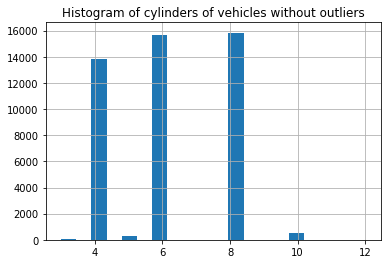

In [88]:
good_data = good_cyl.query('cylinders > @lower_outlier and cylinders < @upper_outlier') #to eliminate the outliers from the data
graph = good_data['cylinders'].hist(bins=20) #to plot a histogram for the given parameter
graph.set_title('Histogram of cylinders of vehicles without outliers');

# Comparing data with and without Outliers

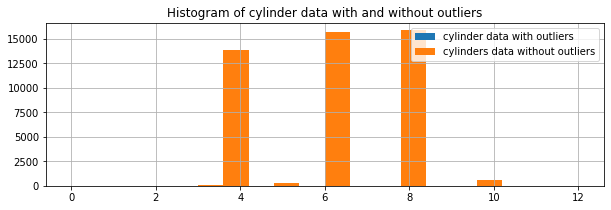

In [89]:
graph = good_cyl['cylinders'].hist(bins=20,figsize=(10,3),range=(0,12),label = 'cylinder data with outliers') #to plot a histogram for the given parameter
graph = good_data['cylinders'].hist(bins=20,figsize=(10,3),range=(0,12),label = 'cylinders data without outliers') 
#to plot a histogram for the given parameter

graph.set_title('Histogram of cylinder data with and without outliers')
graph.legend();

As we can see the outliers elimination doesn't really effect our histogram.

Here it's noticeable that the vehicles with 4,6,8 cylinders are the most popular one's here, that may be because all the mid-range cars have mostly about 4 to 8 cylinders due to which most of the people can think of buying it as it is much affordable option than others.

Text(0.5, 1.0, 'Histogram of condition of vehicles')

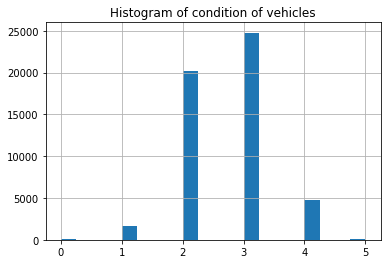

In [90]:
graph = data['condition'].hist(bins=20) #to plot a histogram for the given parameter
graph.set_title('Histogram of condition of vehicles');

From the above graph we can see that the cars in excellent condition are most popular ones, followed by vehicles which are in good condition and which look almost like new ones. May be most people prefer vehicles which are in excellent condition and look like a new one at a much affordable price than actual new one's.!

In [91]:
Q1 = data['condition'].quantile(0.25) #to get the first quartile
Q1

2.0

In [92]:
Q3 = data['condition'].quantile(0.75) #to get the third quartile
Q3

3.0

In [93]:
IQR = 1.5*(Q3 - Q1) #to determine the inter quartile range
lower_outlier = Q1 - IQR #to determine the lower outlier
upper_outlier = Q3 + IQR #to determine the upper outlier
print(lower_outlier)
print(upper_outlier)

0.5
4.5


# Data without Outliers

In [94]:
good_data = data.query('condition > @lower_outlier and condition < @upper_outlier') #to eliminate the outliers from the data

Text(0.5, 1.0, 'Histogram of condition of vehicles without outliers')

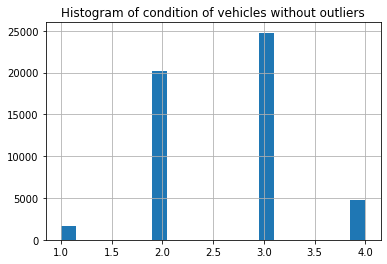

In [95]:
graph = good_data['condition'].hist(bins=20) #to plot a histogram for the given parameter
graph.set_title('Histogram of condition of vehicles without outliers');

# Comparing data with and without Outliers

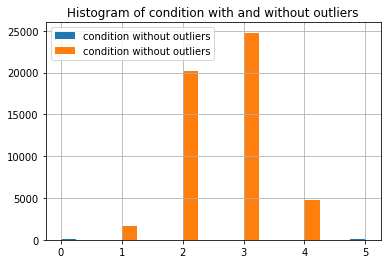

In [96]:
graph = data['condition'].hist(bins=20,range=(0,5),label = 'condition without outliers') #to plot a histogram for the given parameter
graph = good_data['condition'].hist(bins=20,range=(0,5),label = 'condition without outliers') #to plot a histogram for the given parameter
graph.set_title('Histogram of condition with and without outliers')
graph.legend();

After deleting the outliers from our data we can see that there is not much variation in the data, except for the fewer vehicles which are new and salvage have been eliminated from the data. The most popular ones are still the excellent and good one's followed by like news' only ;)

# Analysing the 'mileage'

In [97]:
 data['mileage'].value_counts().head(10) #to get the unique values and their counts

97078     367
106602    343
149000    339
119339    331
90401     314
         ... 
150202      1
144053      1
199346      1
49835       1
147336      1
Name: mileage, Length: 17814, dtype: int64

Text(0.5, 1.0, 'Histogram of mileage of vehicles')

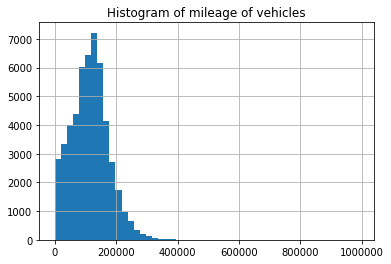

In [98]:
graph = data['mileage'].hist(bins=50) #to plot a histogram for the given parameter
graph.set_title('Histogram of mileage of vehicles');

In [99]:
Q1 = data['mileage'].quantile(0.25) #to get the first quartile

In [100]:
Q3 = data['mileage'].quantile(0.75) #to get the third quartile

In [101]:
IQR = 1.5*(Q3 - Q1) #to determine the inter quartile range
lower_outlier = Q1 - IQR #to determine the lower outlier
upper_outlier = Q3 + IQR #to determine the upper outlier
print(lower_outlier)
print(upper_outlier)

-44680.5
269611.5


# Data without Outliers

Text(0.5, 1.0, 'Histogram of mileage of vehicles without outliers')

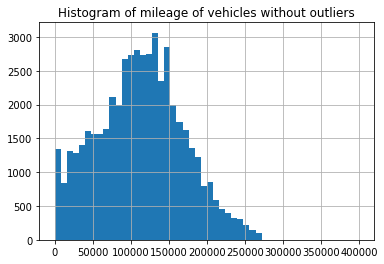

In [102]:
good_data = data.query('mileage > @lower_outlier and mileage < @upper_outlier') #to eliminate the outliers from the data
graph = good_data['mileage'].hist(bins=50,range=(0,400000)) #to plot a histogram for the given parameter
graph.set_title('Histogram of mileage of vehicles without outliers');

# Comparing data with and without Outliers

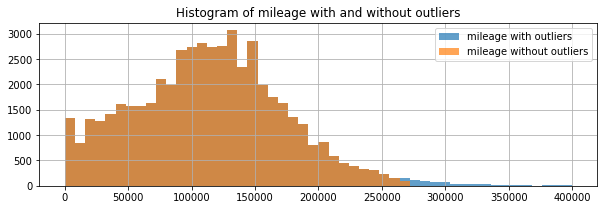

In [103]:
graph = data['mileage'].hist(bins=50,figsize=(10,3),range=(0,400000),alpha=(0.7),label='mileage with outliers') #to plot a histogram for the given parameter
graph = good_data['mileage'].hist(bins=50,figsize=(10,3),range=(0,400000),alpha=(0.7),label='mileage without outliers') #to plot a histogram for the given parameter
graph.set_title('Histogram of mileage with and without outliers')
graph.legend();


When both the graphs with and without outliers are compared we find that maximum number of vehicles had the mileage ranging between 50000 to 190000 .

The vehicles with mileage greater than almost 270000 aren't considered in the modified data just to avoid it's effect on the numerical statistics.

# Analysis based on 'days_listed'

Text(0.5, 1.0, 'Histogram of (days_listed) of vehicles')

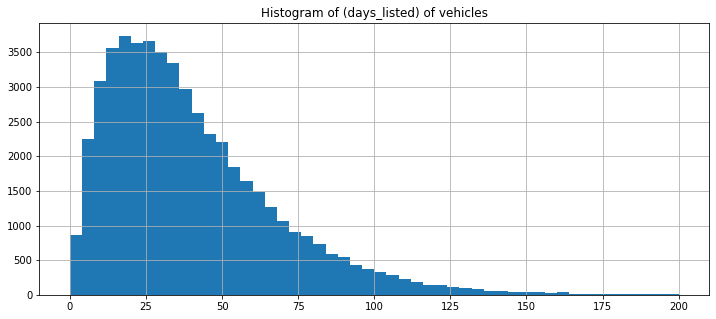

In [104]:
graph = data['days_listed'].hist(bins=50,range=(0,200),figsize=(12,5)) #to plot a histogram for the given parameter
graph.set_title('Histogram of (days_listed) of vehicles');

In [105]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,mileage,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,145000,20714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,88705,12672
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,110000,18333
3,1500,2003,ford f-150,1,8,gas,193850,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16,193850,12115
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,80903,40451
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,57954,14488
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,3,12,2018,3,79212,26404
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,0,1,2019,6,109473,18245
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,0,7,2018,6,104174,17362
9,9200,2008,honda pilot,3,-1,gas,147191,automatic,SUV,blue,True,2019-02-15,17,4,2,2019,11,147191,13381


In [106]:
data['days_listed'].describe()

count    51521.000000
mean        39.555346
std         28.204851
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

-----------The mean of the total days the advertisements were displayed is 39.5 days and the median is 33 days-----------

#considering the fact that 75% of the ads were ranging for about 53 days
#considering the fact that 25% of the ads were ranging for about 19 days

-------------------Typical lifetime of an ad ranges between 19 to 53 days-----------------------

In [107]:
Q1 = data['days_listed'].quantile(0.25) #to get the first quartile

In [108]:
Q3 = data['days_listed'].quantile(0.75) #to get the first quartile

In [109]:
IQR = 1.5*(Q3 - Q1) #to determine the inter quartile range
lower_outlier = Q1 - IQR #to determine the lower outlier
upper_outlier = Q3 + IQR #to determine the upper outlier
print(lower_outlier)
print(upper_outlier)

-32.0
104.0


In [110]:
good_data = data.query('days_listed > @lower_outlier and days_listed < @upper_outlier')

In order to analyse the ads that stayed for a really short period and for abnormally long period I would like to categorize the data into two categories on being too_quick which is less than a week and other being abnormal which is greater than 100 days.

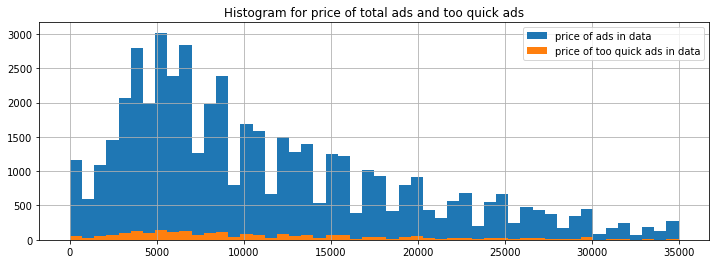

In [111]:
too_quick = good_data.query('days_listed < 7') #to get the data of 'days_listed' column for less than 7 days

graph = good_data['price'].hist(bins=50,range=(0,35000),grid=True,figsize=(12,4),label=('price of ads in data')) #to plot a histogram for the given parameter

graph = too_quick['price'].hist(bins=50,range=(0,35000),grid=True,figsize=(12,4),label=('price of too quick ads in data')) #to plot a histogram for the given parameter

graph.set_title('Histogram for price of total ads and too quick ads')

graph.legend();


In [112]:
too_quick['price'].describe()

count     2420.000000
mean     12286.188430
std       9756.932883
min          1.000000
25%       5000.000000
50%       9425.000000
75%      16981.250000
max      66000.000000
Name: price, dtype: float64

Above graph shows that, the ads that disappeared from the website with in a week are very few when compared to the total ads that are almost less than 200 in number. Therefore these bins are so low on the histogram.

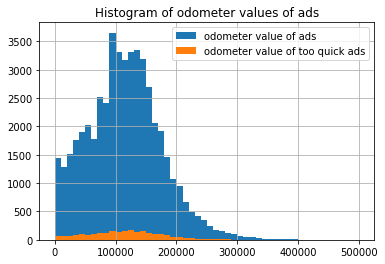

In [113]:

graph = good_data['odometer'].hist(bins=50,range=(0,500000),label=('odometer value of ads')) #to plot a histogram for the given parameter
graph = too_quick['odometer'].hist(bins=50,range=(0,500000),label=('odometer value of too quick ads')) #to plot a histogram for the given parameter
graph.set_title('Histogram of odometer values of ads')
graph.legend();

In [114]:
too_quick['odometer'].describe()

count      2420.000000
mean     115217.872727
std       66031.316398
min           0.000000
25%       70570.750000
50%      115129.000000
75%      152048.250000
max      990000.000000
Name: odometer, dtype: float64

From the above graph we can see that very few ads were removed from the site in the span of a week when compared to the total number of ads posted, Therefore the bins are too low.

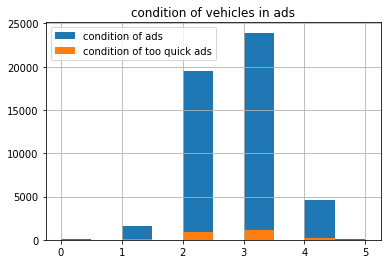

In [115]:
graph = good_data['condition'].hist(label=('condition of ads')) #to plot a histogram for the given parameter
graph = too_quick['condition'].hist(label=('condition of too quick ads')) #to plot a histogram for the given parameter
graph.set_title('condition of vehicles in ads')
graph.legend();

As we can see in the above histogram there are absolutely no cars sold which are brand new and in salvage condition.

Moreover the count of such quicker ads is too low when compared to the total ads on the website which is almost below 100.

In [116]:
too_quick['condition'].describe()

count    2420.000000
mean        2.660331
std         0.723089
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: condition, dtype: float64

Seems like people are preferring the vehicles whic are in either good condition or an excellent condition..!!!

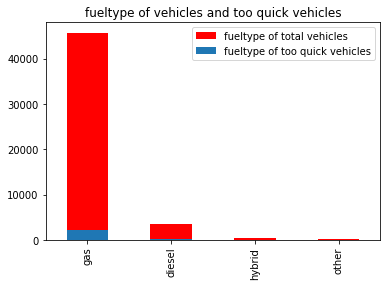

In [117]:
graph = (good_data['fuel'].value_counts().plot(kind='bar',label=('fueltype of total vehicles'),color='red'))
graph = (too_quick['fuel'].value_counts().plot(kind='bar',label=('fueltype of too quick vehicles')))

graph.set_title('fueltype of vehicles and too quick vehicles')
graph.legend();

In [118]:
too_quick['fuel'].describe()

count     2420
unique       4
top        gas
freq      2202
Name: fuel, dtype: object

Looks like Hybrid and Electric vehicles aren't much in demand to be sold with in a week as that of the vehicles that run through gas.

Only fewer gas and diesel vehicles were sold in a span of a week there by resulting in lower bins of histogram.

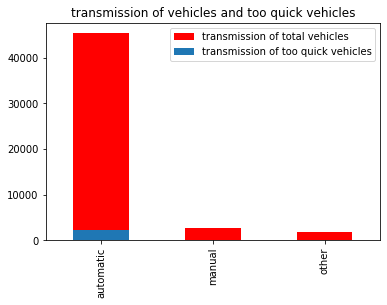

In [119]:
graph = (good_data['transmission'].value_counts().plot(kind='bar',label=('transmission of total vehicles'),color='red'))
graph = (too_quick['transmission'].value_counts().plot(kind='bar',label=('transmission of too quick vehicles')))
graph.set_title('transmission of vehicles and too quick vehicles')
graph.legend();

As expected maximum number of people love staying in their comfort zone and opt for automatic vehicles rather that putting all the efforts in driving a manual one..! :P

Very few automatic vehicles were sold in less than 7 days, resulting in too low bins compared to total vehicles in histogram.

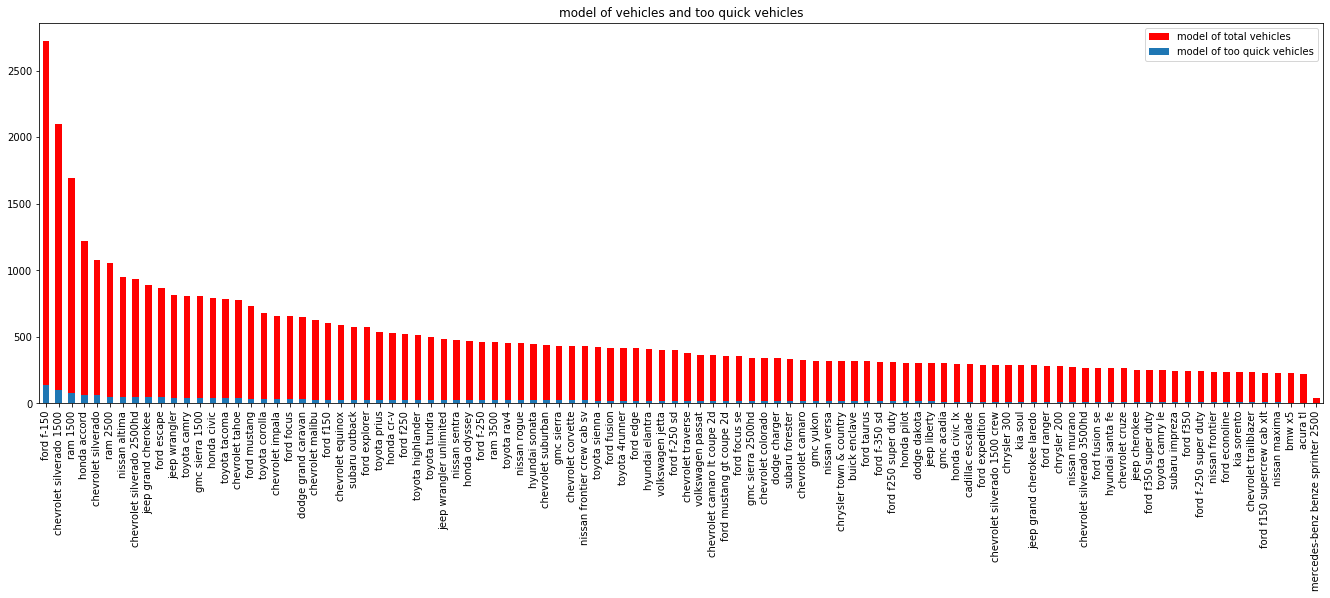

In [120]:
graph = good_data['model'].value_counts().plot(kind='bar',label=('model of total vehicles'),color='red',figsize=(23,7))
graph = too_quick['model'].value_counts().plot(kind='bar',label=('model of too quick vehicles'),figsize=(23,7))
graph.set_title('model of vehicles and too quick vehicles')
graph.legend();

In [121]:
too_quick['model'].describe()

count           2420
unique           100
top       ford f-150
freq             136
Name: model, dtype: object

---------------Ford f-150 seems to be preety popular and fast selling vehicle out there.------------

Very few vehicles were sold among all different models of vehicles , there by resulting in extreme low bins when compared to that of total vehicles histogram.

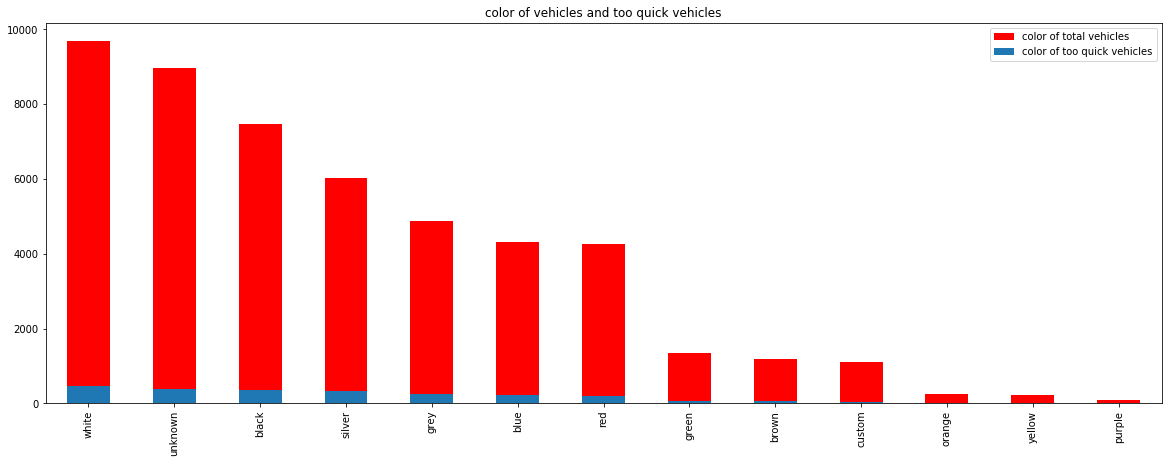

In [122]:
graph = good_data['paint_color'].value_counts().plot(kind='bar',label=('color of total vehicles'),color='red',figsize=(20,7))
graph = too_quick['paint_color'].value_counts().plot(kind='bar',label=('color of too quick vehicles'),figsize=(20,7))
graph.set_title('color of vehicles and too quick vehicles')
graph.legend();

As mentioned above very less number of vehicles were sold with in the period of a week resulting in smaller bins of the histogram. Seems like orange,purple and yellow colors aren't everyone's first choice.

In [123]:
too_quick['paint_color'].describe()

count      2420
unique       13
top       white
freq        475
Name: paint_color, dtype: object

All eyes for peace :) We can see that most people prefer their vehicle color to be white.. which need pretty well maintenance though.!!!

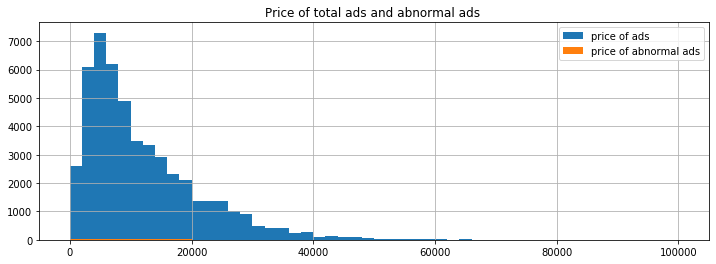

In [124]:
abnormal = good_data.query('days_listed > 100')  #to get the data of 'days_listed' column for more than 150 days

graph = good_data['price'].hist(bins=50,grid=True,figsize=(12,4),range=(0,100000),label=('price of ads')) #to plot a histogram for the given parameter

graph = abnormal['price'].hist(bins=50,grid=True,figsize=(12,4),range=(0,100000),label=('price of abnormal ads')) #to plot a histogram for the given parameter

graph.set_title('Price of total ads and abnormal ads ')

graph.legend();

Very few vehicles i.e., almost below 50 vehicles whose price ranges from 0 to 14000 seems to be staying there for a really long period.

The bins of ads lasting for more than 100 days are almost negligible when compared to the total number of vehicles histogram.

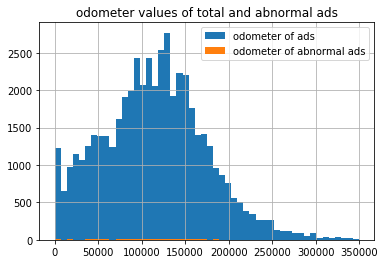

In [125]:
graph = good_data['odometer'].hist(bins=50,range=(0,350000),label=('odometer of ads')) #to plot a histogram for the given parameter

graph = abnormal['odometer'].hist(bins=50,range=(0,350000),label=('odometer of abnormal ads')) #to plot a histogram for the given parameter
graph.set_title('odometer values of total and abnormal ads')
graph.legend();

In [126]:
abnormal['odometer'].describe()

count       245.000000
mean     110118.967347
std       60238.030697
min           0.000000
25%       74055.000000
50%      110000.000000
75%      143000.000000
max      433120.000000
Name: odometer, dtype: float64



The bins of ads lasting for more than 100 days are almost negligible when compared to the total number of vehicles histogram.

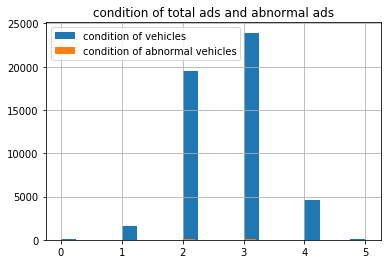

In [127]:
graph = good_data['condition'].hist(bins=20,label=('condition of vehicles')) #to plot a histogram for the given parameter
graph = abnormal['condition'].hist(bins=20,label=('condition of abnormal vehicles'))#to plot a histogram for the given parameter

graph.set_title('condition of total ads and abnormal ads')
graph.legend();



The bins of ads lasting for more than 100 days are almost negligible when compared to the total number of vehicles histogram.

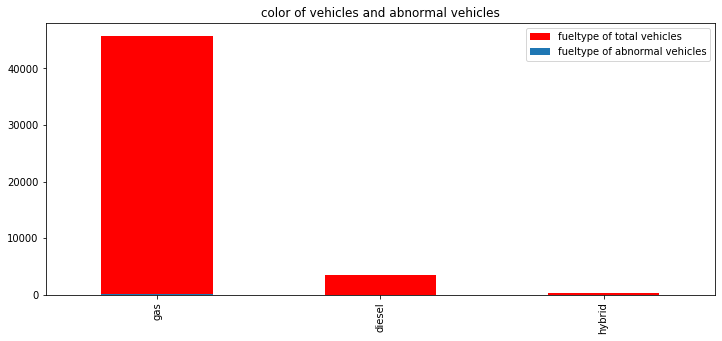

In [128]:
graph = good_data['fuel'].value_counts().plot(kind='bar',label=('fueltype of total vehicles'),color='red',figsize=(12,5))
graph = abnormal['fuel'].value_counts().plot(kind='bar',label=('fueltype of abnormal vehicles'),figsize=(12,5))
graph.set_title('color of vehicles and abnormal vehicles')
graph.legend();

Here the gas vehicles remained for a really long time where as there were no 'other' type of vehicles in this category.



The bins of ads lasting for more than 100 days are almost negligible when compared to the total number of vehicles histogram.

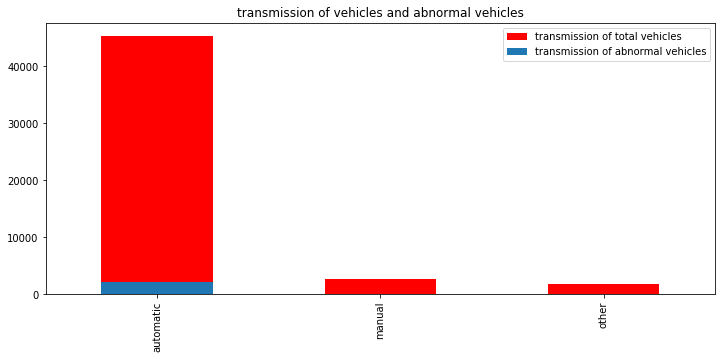

In [129]:
graph = good_data['transmission'].value_counts().plot(kind='bar',label=('transmission of total vehicles'),color='red',figsize=(12,5))
graph = too_quick['transmission'].value_counts().plot(kind='bar',label=('transmission of abnormal vehicles'),figsize=(12,5))
graph.set_title('transmission of vehicles and abnormal vehicles')
graph.legend();

Manual and other transmission type vehicles weren't present for more than 100 days.

The bins of ads lasting for more than 100 days are almost negligible when compared to the total number of vehicles histogram.

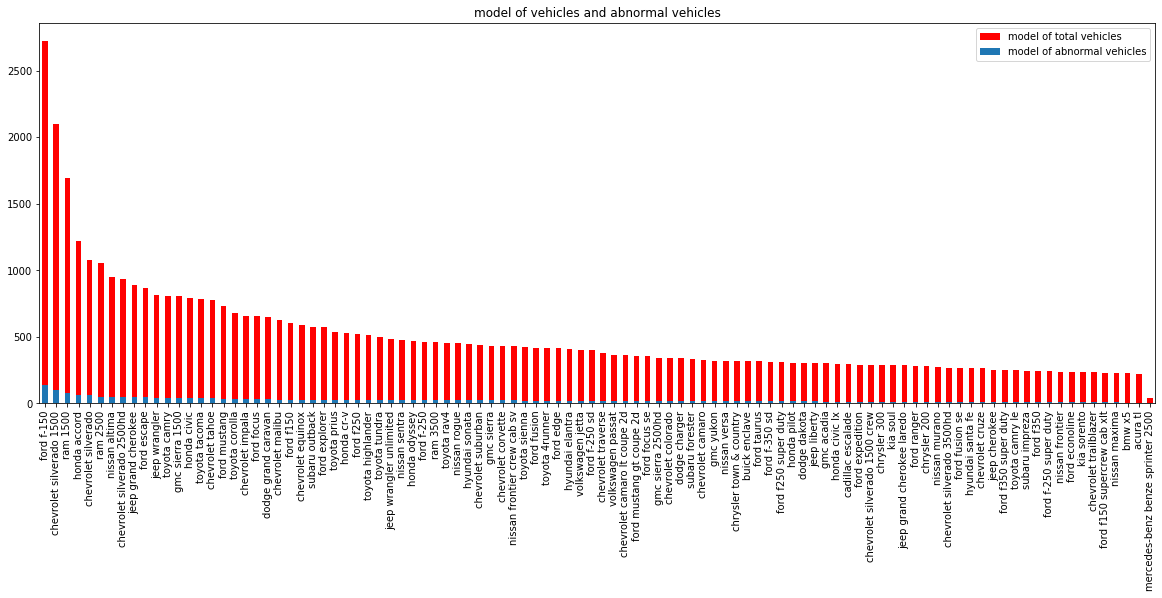

In [130]:
graph = good_data['model'].value_counts().plot(kind='bar',label=('model of total vehicles'),color='red',figsize=(20,7))
graph = too_quick['model'].value_counts().plot(kind='bar',label=('model of abnormal vehicles'),figsize=(20,7))
graph.set_title('model of vehicles and abnormal vehicles')
graph.legend();

surprisingly most of the ford f 150 also stayed for about 100 days.!



The bins of ads lasting for more than 100 days are almost negligible when compared to the total number of vehicles histogram.

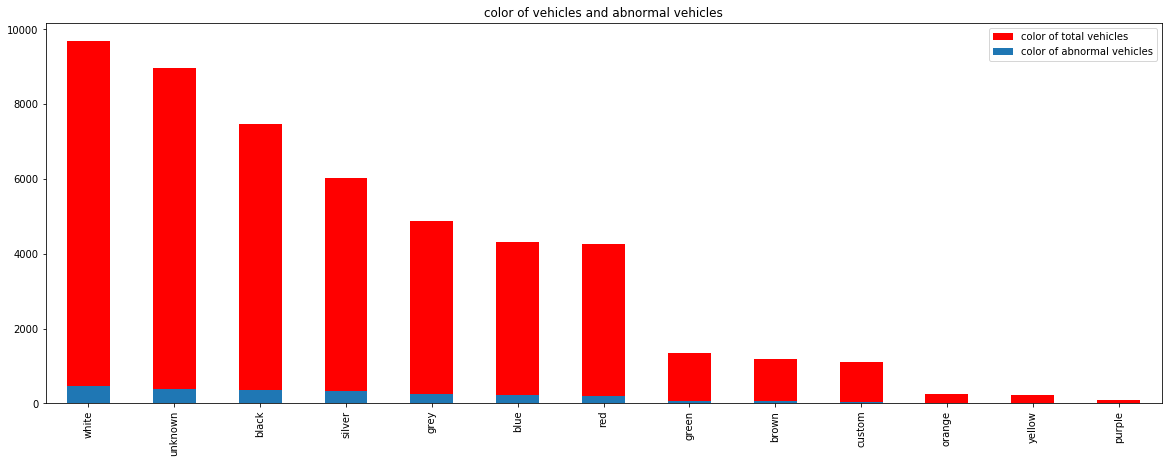

In [131]:
graph = good_data['paint_color'].value_counts().plot(kind='bar',label=('color of total vehicles'),color='red',figsize=(20,7))
graph = too_quick['paint_color'].value_counts().plot(kind='bar',label=('color of abnormal vehicles'),figsize=(20,7))
graph.set_title('color of vehicles and abnormal vehicles')
graph.legend();



The bins of ads lasting for more than 100 days are almost negligible when compared to the total number of vehicles histogram.

In [132]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,mileage,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,145000,20714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,88705,12672
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,110000,18333
3,1500,2003,ford f-150,1,8,gas,193850,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16,193850,12115
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,80903,40451
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,57954,14488
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,3,12,2018,3,79212,26404
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,0,1,2019,6,109473,18245
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,0,7,2018,6,104174,17362
9,9200,2008,honda pilot,3,-1,gas,147191,automatic,SUV,blue,True,2019-02-15,17,4,2,2019,11,147191,13381


# Average Price for each vehicle type

In [133]:
avg_price_fortype = good_data.pivot_table(index='type',values='price',aggfunc='mean') #to calculate a pivot table for 'type' and 'price'
avg_price_fortype

,price
type,
SUV,11165.556419
bus,17135.666667
convertible,14532.709977
coupe,14386.433843
hatchback,6862.652860
mini-van,8207.729560
offroad,14368.757282
other,10927.995984
pickup,16053.888905


In [134]:
ads_per_type = good_data['type'].value_counts()
ads_per_type

SUV            11973
truck          11972
sedan          11755
pickup          6778
coupe           2222
wagon           1477
mini-van        1113
hatchback       1014
van              606
convertible      431
other            249
offroad          206
bus               24
Name: type, dtype: int64

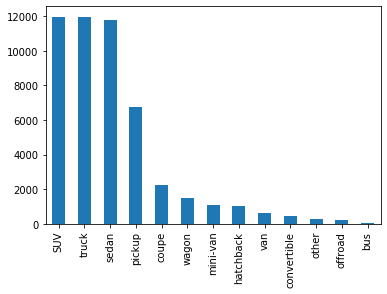

In [135]:
ads_per_type.plot(kind='bar'); #to plot a histogram for the given parameter


-------------The two most popular vehicles are the SUVs and the trucks.------------

In [136]:
suv_type = good_data.query('type == "SUV"and price < 90000') #to filter the data for 'suv' and reducing extremely high price values for accurate results

In [137]:
suv_type['transmission'].value_counts()

automatic    11325
manual         491
other          156
Name: transmission, dtype: int64

In [138]:
suv_type['paint_color'].value_counts()

black      2155
unknown    2151
white      1880
silver     1507
grey       1153
blue       1012
red         881
green       422
brown       350
custom      297
orange       81
yellow       44
purple       39
Name: paint_color, dtype: int64

Here we notice that purple and yellow colored vehicles are in less than 50 ads, so we don't need to analyse them

In [139]:
suv_type_color = suv_type.query('paint_color != "yellow" and paint_color != "purple"')

Correlation between price and vehicle_age is -0.5530734636958855
Correlation between price and mileage is -0.5314300398055078
Correlation between price and condition is 0.2729376478390906


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


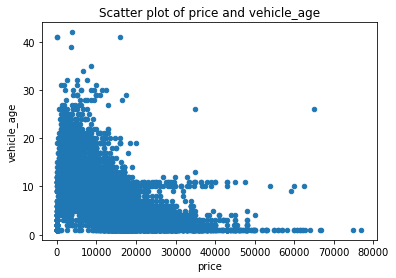

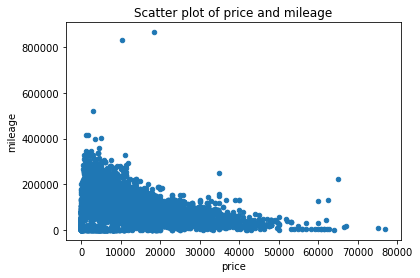

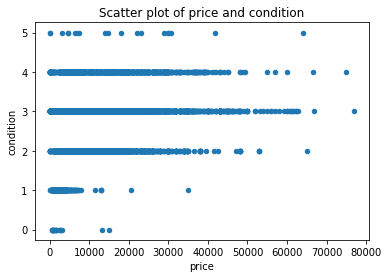

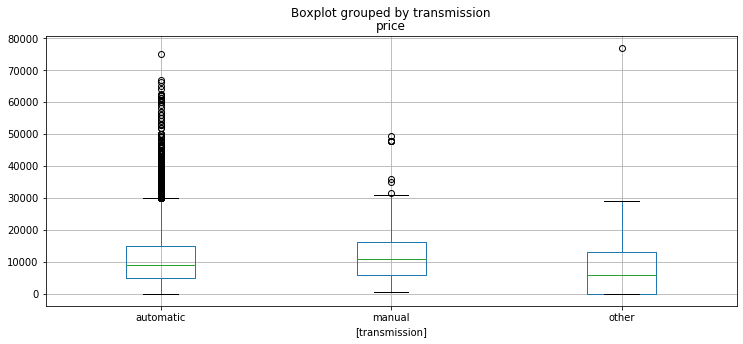

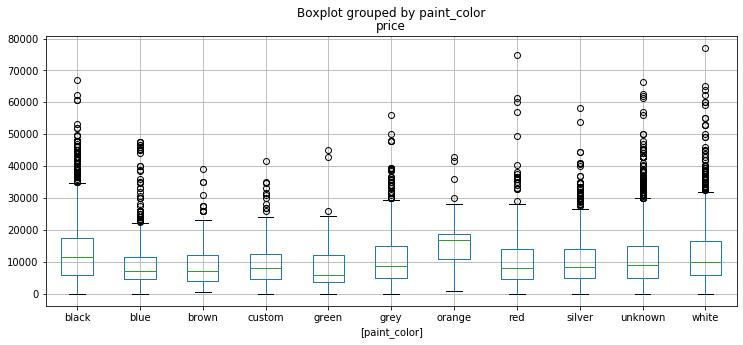

In [140]:


quant_variable_list = ['vehicle_age','mileage','condition'] #to plot graphs for quantitative variables
for column in quant_variable_list:
    graph = suv_type_color.plot(x='price',y=column,kind='scatter') #to draw a scatterplot between the parameters
    graph.set_title('Scatter plot of price and '+column)
for col in quant_variable_list:
    print('Correlation between price and',col,'is', (suv_type['price']).corr(suv_type[col])) #to find the correlation between parameters
    
cat_variable_list = ['transmission','paint_color'] #to plot graphs for categorical variables
for column in cat_variable_list:
    suv_type_color.boxplot(column='price',by=[column],figsize=(12,5)) #to draw a boxplot for the parameters

In [141]:
suv_type_color['paint_color'].value_counts()

black      2155
unknown    2151
white      1880
silver     1507
grey       1153
blue       1012
red         881
green       422
brown       350
custom      297
orange       81
Name: paint_color, dtype: int64

The above analysis shows that the correlation coefficient between 'price'-'vehicle_age' and 'price'-'mileage' is -0.5 approx which means that price increases when the vehicle is more new and having is less used. Where as the correlation coefficient between 'price' and 'condition' is 0.2 which means that the price is increases if the SUV is in a little better condition.

Coming to the transmission type and color of the SUV we can see that maximum price for vehicles is nearly 35000, however there are so many outliers for some vehicles. The highest median price value for orange colored vehicle about 18000 bucks.


Seems like the general price of manual SUVs' is higher than that of automatic and other transmission types, however there are several outliers for automatic SUVs' ranging almost upto 75000 bucks.

In [142]:
truck_type = good_data.query('type == "truck" and price <=200000')  #to filter the data for 'truck' and reducing extremely high price values for accurate results

In [143]:
truck_type['transmission'].value_counts()

automatic    11340
manual         432
other          199
Name: transmission, dtype: int64

In [144]:
truck_type['paint_color'].value_counts()

white      3620
unknown    2075
black      1539
red        1015
silver      994
grey        923
blue        854
custom      302
green       273
brown       247
yellow       66
orange       47
purple       16
Name: paint_color, dtype: int64

Here we notice that purple and orange colored vehicles are in less than 50 ads, so we don't need to be analyse them

In [145]:
truck_type_color = truck_type.query('paint_color != "orange" and paint_color != "purple"')

Correlation between price and vehicle_age is -0.5536476651507439
Correlation between price and mileage is -0.4526644991198723
Correlation between price and condition is 0.31076164302056


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


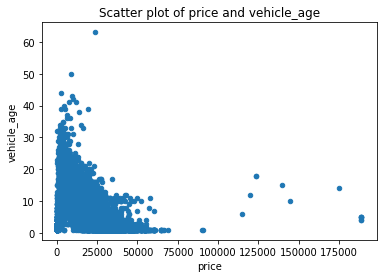

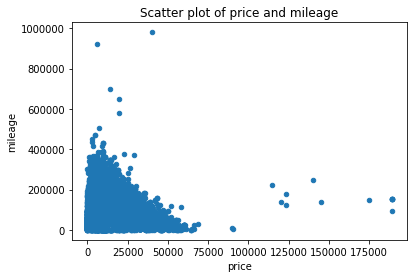

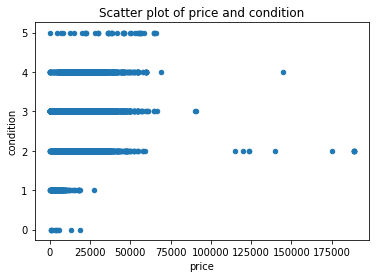

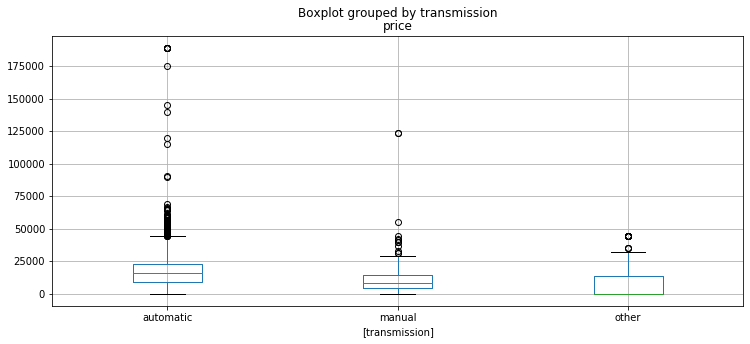

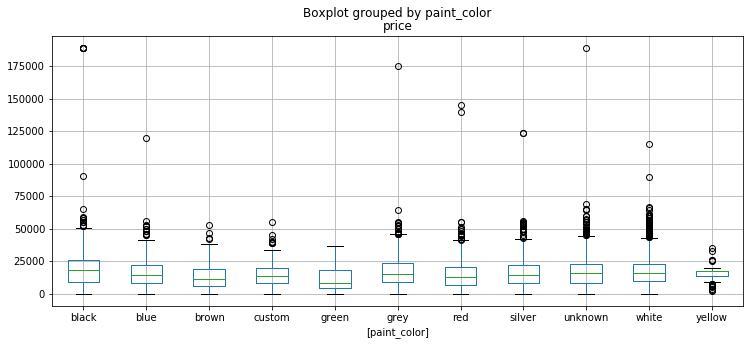

In [146]:


quant_variable_list = ['vehicle_age','mileage','condition'] #to plot graphs for quantitative variables
for column in quant_variable_list:
    graph = truck_type_color.plot(x='price',y=column,kind='scatter') #to draw a scatterplot between the parameters
    graph.set_title('Scatter plot of price and '+column)
for col in quant_variable_list:
    print('Correlation between price and',col,'is', (truck_type['price']).corr(truck_type[col])) #to find the correlation between parameters
    
cat_variable_list = ['transmission','paint_color']  #to plot graphs for categorical variables
for column in cat_variable_list:
    truck_type_color.boxplot(column='price',by=[column],figsize=(12,5)) #to draw a boxplot for the parameters
    


The above analysis shows that the correlation coefficient between 'price'-'vehicle_age' and 'price'-'mileage' is -0.5 and -0.4 approx which means that price increases when the vehicle is more new and having is less used. Where as the correlation coefficient between 'price' and 'condition' is 0.3 which means that the price is increases if the Truck is in a better condition.

Coming to the transmission type and color of the trucks, we can see that the black colored vehicles have the maximum price of nearly 50000 bucks . The median price varies from 10000 to 20000 for different type of colored vehicles.

Seems like the general price of automatic trucks is higher than that of manual and other transmission types, there are several outliers for the automatic trucks and their highest price being nearly 40000 bucks.

### Step 5. Overall conclusion

I have thoroughly examined the data of the advertisements published over the last few years and found out that the following factors would have a great impact on the price of the vehicle:

1. The model of the vehicle , whether it is the most popular model like in our case one of it was Ford f-150 which may be having most demamded one in the market.


2. Also how well the vehicle is maintained , depending on its condition both externally and functionally


3. Whether the vehicle, be it a new one or a used one is how old when compared to the year the model was actually launched.


4. How much mileage does it offer!


5. If the total number of cylinders is more then speed and maitenance of the vehicle increases which also increases the building expenses.

There were few insights I found based on my analysis of the data:


1. There were few vehicles that were falsely reported like the case of different models of vehicles assigned to incorrect model years.


2. Few ads of same vehicle were posted repeatedly may be due to the tenure of the ad posted on the site was expired.


3. The correlation coefficient between 'price'-'vehicle_age' and 'price'-'mileage' is -0.5 and -0.4 approx which means that price increases when the vehicle is more new and having is less used. Where as the correlation coefficient between 'price' and 'condition' is 0.3 which means that the price is increases if the TRUCK is in a better condition.

4. Correlation coefficient between 'price'-'vehicle_age' and 'price'-'mileage' is -0.5 approx which means that price increases when the vehicle is more new and having is less used. Where as the correlation coefficient between 'price' and 'condition' is 0.2 which means that the price is increases if the SUV is in a little better condition.

Suggestion:

I think the filters must be set more accuratley like:

1. When a person clicks on posting an ad when he types the car model name then there should be two options like to know whether it's a brand new or a pre used one. Based on that the minimum price to be entered must be displayed.

2. When a model name is typed the filter must display the minimum year value as date of manufacture or launch date.

This way most of the fake ads or meaningless ads can be removed and number of quality ads can be improved there by enhancing the sales.





